In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Читать изображение

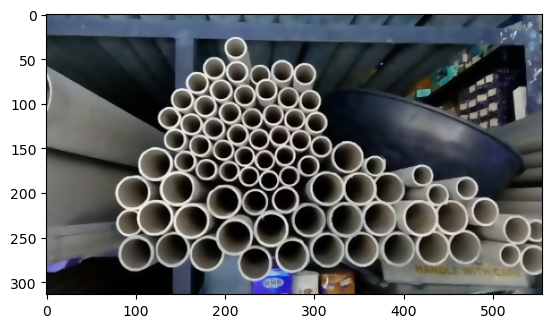

In [2]:
src = cv.imread(r"D:\Projects\Pycharm_projects\CV\lab02\task2\pipes-4.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
plt.imshow(src)

# Преобразовать в черно-белое изображение

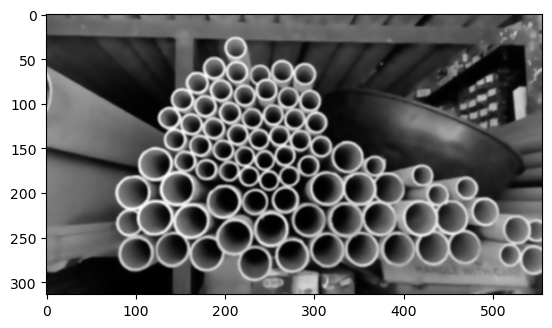

In [3]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))
plt.imshow(gray, 'gray')
plt.show()

# Использовать преобразование Хафа (HOUGH_GRADIENT_ALT) для обнаружения кругов на изображении

In [4]:
from cv2 import HOUGH_GRADIENT_ALT  

detected_circles = cv.HoughCircles(
    gray,                         
    HOUGH_GRADIENT_ALT,           
    1.5,                         
    5,                          
    param1=300,                 
    param2=0.9,                  
    minRadius=0, maxRadius=30  
)

Total pipes:  78


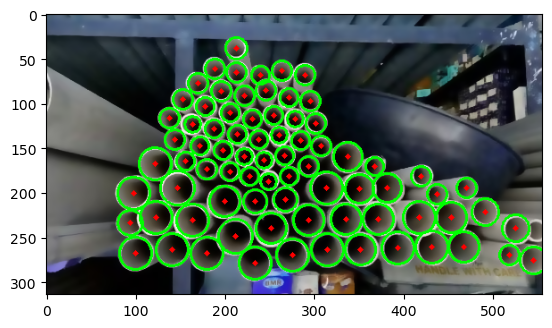

In [5]:
image = src.copy()
pipes_count = 0

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) 

    for points in detected_circles[0, :]:
        a, b, r = points[0] , points[1] , points[2] 

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1


print("Total pipes: ", pipes_count)
plt.imshow(image)
plt.show()

